# Convolutional Neural Network model for Image recognition

In [2]:
# pip install tensorflow

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import time

In [5]:
# Make output stable accross runs
np.random.seed(42)
tf.random.set_seed(42)
keras.backend.clear_session()

### Setting up the data for NCC Model

In [3]:
# import the train data
with open('emnist_train.pkl', 'rb') as f:
    train_set = pickle.load(f)

In [2]:
# import the test data
with open('emnist_test.pkl', 'rb') as f:
    test_set = pickle.load(f)

In [4]:
# Rename the datasets

X_train_full = train_set['data']
y_train_full = train_set['labels']
X_test = test_set['data']
y_test = test_set['labels']

In [5]:
def plot_image(image):
# Remove redundant extra dimension
    if image.shape[-1] == 1:
        image = image.squeeze(axis=-1)

    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

In [6]:
def plot_examples(X, y, range_from, images_per_col):
    plt.figure(figsize=(10,10))
    for i in range(range_from,range_from+images_per_col*2):
        plt.subplot(images_per_col,images_per_col,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X[i], cmap= 'gray')
        plt.xlabel(y[i])

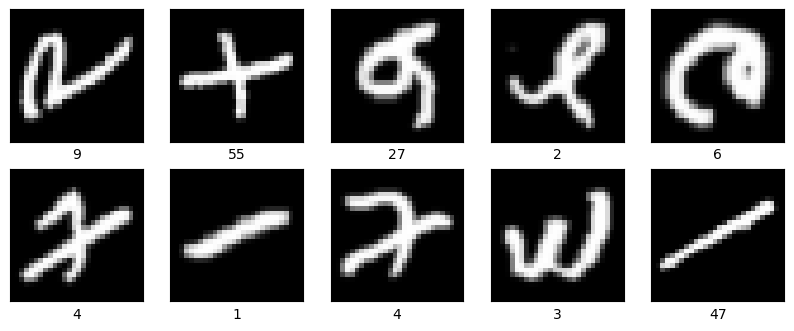

In [7]:
# Plotting examples
plot_examples(X_train_full, y_train_full, 10, 5)

In [8]:
# Set up up validation sets from 10% of the train set

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, train_size=0.9, stratify = y_train_full)

In [9]:
# LeNet model receives 32 x 32. The dataset is padded with zeros and pixels are scaled between 0 and 1:

X_train = tf.pad(X_train, [[0, 0], [2,2], [2,2]])/255
X_valid = tf.pad(X_valid, [[0, 0], [2,2], [2,2]])/255
X_test = tf.pad(X_test, [[0, 0], [2,2], [2,2]])/255
print(f"Shape of X_train: {X_train.shape}")

Shape of X_train: (90000, 32, 32)


In [10]:
# Add an extra dimension to our data

X_train = np.expand_dims(X_train, -1)
X_valid = np.expand_dims(X_valid, -1)
X_test = np.expand_dims(X_test, -1)
print(f"New shape of X_train: {X_train.shape}")

New shape of X_train: (90000, 32, 32, 1)


## Defining the model

In [11]:
# Setting up the initial model

model = keras.Sequential([

# Specify the input shape
keras.Input(shape=(32, 32, 1)),

# Conv and pool block 1
keras.layers.Conv2D(6, kernel_size=(5, 5), activation="tanh"),
keras.layers.AveragePooling2D(pool_size=(2, 2),strides = 2),

# Conv and pool block 2
keras.layers.Conv2D(16, kernel_size=(5, 5), activation="tanh"),
keras.layers.AveragePooling2D(pool_size=(2, 2),strides = 2),

# Fully Connected Convolution Layer
keras.layers.Dense(120, activation="tanh"),

# Flatten and classify using dense output layer
keras.layers.Flatten(),
keras.layers.Dense(84, activation="tanh"),
keras.layers.Dense(62, activation= "softmax"),
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 dense (Dense)               (None, 5, 5, 120)         2040      
                                                                 
 flatten (Flatten)           (None, 3000)              0

In [13]:
# Compile model with loss, optimiser, and metrics
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [14]:
batch_size = 128
epochs = 10

In [15]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_valid, y_valid))

Epoch 1/10
704/704 [==============================] - 10s 13ms/step - loss: 1.2395 - accuracy: 0.6673 - val_loss: 0.8399 - val_accuracy: 0.7497
Epoch 2/10
704/704 [==============================] - 10s 14ms/step - loss: 0.6951 - accuracy: 0.7848 - val_loss: 0.6066 - val_accuracy: 0.8059
Epoch 3/10
704/704 [==============================] - 10s 15ms/step - loss: 0.5565 - accuracy: 0.8163 - val_loss: 0.5348 - val_accuracy: 0.8216
Epoch 4/10
704/704 [==============================] - 10s 15ms/step - loss: 0.5008 - accuracy: 0.8308 - val_loss: 0.5102 - val_accuracy: 0.8284
Epoch 5/10
704/704 [==============================] - 11s 15ms/step - loss: 0.4664 - accuracy: 0.8390 - val_loss: 0.4860 - val_accuracy: 0.8338
Epoch 6/10
704/704 [==============================] - 11s 16ms/step - loss: 0.4434 - accuracy: 0.8439 - val_loss: 0.4830 - val_accuracy: 0.8313
Epoch 7/10
704/704 [==============================] - 11s 15ms/step - loss: 0.4245 - accuracy: 0.8497 - val_loss: 0.4757 - val_accuracy:

In [16]:
 # Evaluate the classifier on the test data.
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy on test data: {accuracy:.4f}")
print(f"Loss on test data: {loss:.4f}")


625/625 [==============================] - 2s 3ms/step - loss: 0.4852 - accuracy: 0.8349
Accuracy on test data: 0.8349
Loss on test data: 0.4852


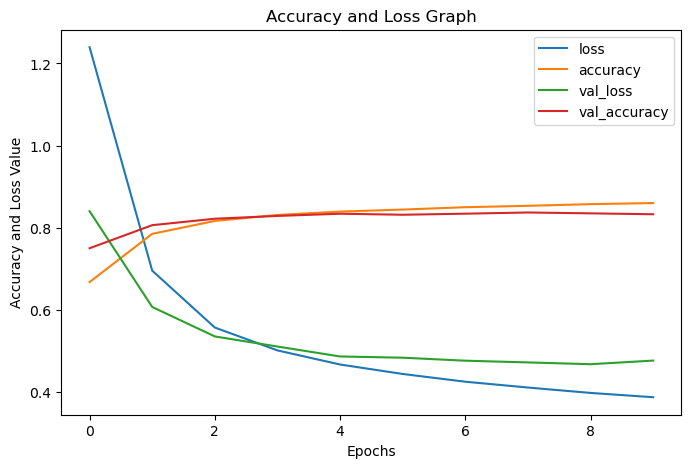

In [17]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.xlabel('Epochs')
plt.ylabel('Accuracy and Loss Value')
plt.title('Accuracy and Loss Graph')
plt.show()

## Tuning the Model

In [19]:
# Model experimentation

# Tried changing AveragePooling to MaxPooling
# Tried adding a dropout layer
# Tried changing activation from tanh to ReLu


model2 = keras.Sequential([

# Specify the input shape
keras.Input(shape=(32, 32, 1)),

# Conv and pool block 1
keras.layers.Conv2D(6, kernel_size=(5, 5), activation="tanh"),
keras.layers.AveragePooling2D(pool_size=(2, 2),strides = 2),
# keras.layers.MaxPooling2D(pool_size=(2, 2),strides = 2),
    
# Conv and pool block 2
keras.layers.Conv2D(16, kernel_size=(5, 5), activation="tanh"),
keras.layers.AveragePooling2D(pool_size=(2, 2),strides = 2),
# keras.layers.MaxPooling2D(pool_size=(2, 2),strides = 2),
    
# Fully Connected Convolution Layer
keras.layers.Dense(120, activation="tanh"),

# Flatten and classify using dense output layer
keras.layers.Flatten(),
# keras.layers.Dropout(0.2),
keras.layers.Dense(84, activation="tanh"),
keras.layers.Dense(62, activation= "softmax"),
])

In [20]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_2 (Avera  (None, 14, 14, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 dense_3 (Dense)             (None, 5, 5, 120)         2040      
                                                                 
 flatten_1 (Flatten)         (None, 3000)             

In [21]:
# Compile model with loss, optimiser, and metrics
model2.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [22]:
batch_size = 1024
epochs = 1000

In [23]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [24]:
history2 = model2.fit(X_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    callbacks=[es],
                    verbose = 1,
                    validation_data=(X_valid, y_valid))

Epoch 1/1000
88/88 [==============================] - 7s 75ms/step - loss: 2.1283 - accuracy: 0.4992 - val_loss: 1.3529 - val_accuracy: 0.6449
Epoch 2/1000
88/88 [==============================] - 6s 73ms/step - loss: 1.1817 - accuracy: 0.6829 - val_loss: 1.0386 - val_accuracy: 0.7076
Epoch 3/1000
88/88 [==============================] - 7s 75ms/step - loss: 0.9572 - accuracy: 0.7286 - val_loss: 0.8760 - val_accuracy: 0.7434
Epoch 4/1000
88/88 [==============================] - 7s 75ms/step - loss: 0.8057 - accuracy: 0.7615 - val_loss: 0.7554 - val_accuracy: 0.7673
Epoch 5/1000
88/88 [==============================] - 6s 73ms/step - loss: 0.7005 - accuracy: 0.7856 - val_loss: 0.6782 - val_accuracy: 0.7804
Epoch 6/1000
88/88 [==============================] - 6s 72ms/step - loss: 0.6296 - accuracy: 0.8019 - val_loss: 0.6196 - val_accuracy: 0.7987
Epoch 7/1000
88/88 [==============================] - 7s 74ms/step - loss: 0.5813 - accuracy: 0.8125 - val_loss: 0.5842 - val_accuracy: 0.8088

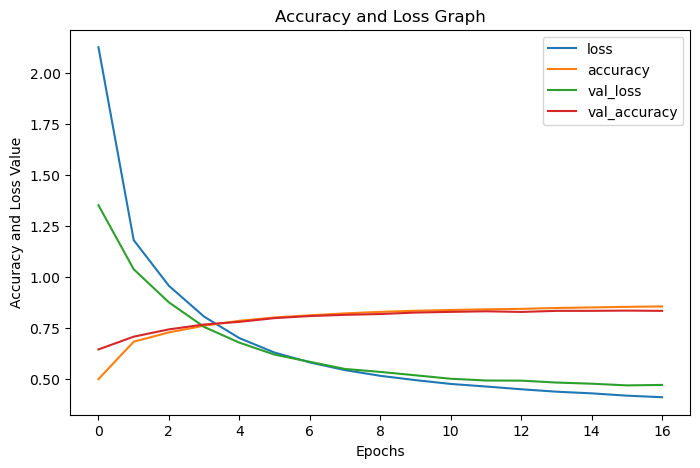

In [25]:
pd.DataFrame(history2.history).plot(figsize=(8,5))
plt.xlabel('Epochs')
plt.ylabel('Accuracy and Loss Value')
plt.title('Accuracy and Loss Graph')
plt.show()

In [26]:
 # Evaluate the classifier on the test data.
loss, accuracy = model2.evaluate(X_test, y_test)
print(f"Accuracy on test data: {accuracy:.4f}")
print(f"Loss on test data: {loss:.4f}")

625/625 [==============================] - 2s 3ms/step - loss: 0.4779 - accuracy: 0.8373
Accuracy on test data: 0.8373
Loss on test data: 0.4779


In [34]:
# Calculate Precision, Recall, F1 scores and show confusion matrix

# Calculate predicted values

y_probs = model2.predict(X_test)
y_pred = np.argmax(y_probs, axis = -1)

# Calculate Precision score, recall, f1 and set up confusion matrix

prec = precision_score(y_test, y_pred, average = 'macro', zero_division = 0.0)
recall = recall_score(y_test, y_pred, average = 'macro')
f1 = f1_score(y_test, y_pred, average = 'macro')

print (f"Precision: {prec:.4f} \nRecall: {recall:.4f} \nf1_score: {f1:.4f}")

625/625 [==============================] - 2s 3ms/step
Precision: 0.7381 
Recall: 0.6862 
f1_score: 0.6934


## Looking at where the predictions were wrong

In [35]:

# Looking through a sample of predicted values vs actual values to find which records are different

pred={}
for i in range(1,10):
    pred[i] = model2.predict(X_test[i].reshape(1, 32, 32, 1 ))
    print(f"Model's predicted value and Actual test value: {[i],pred[i].argmax(), y_test[i]}")

1/1 [==============================] - 0s 14ms/step
Model's predicted value and Actual test value: ([1], 1, 1)
1/1 [==============================] - 0s 16ms/step
Model's predicted value and Actual test value: ([2], 2, 2)
1/1 [==============================] - 0s 14ms/step
Model's predicted value and Actual test value: ([3], 9, 9)
1/1 [==============================] - 0s 14ms/step
Model's predicted value and Actual test value: ([4], 37, 37)
1/1 [==============================] - 0s 14ms/step
Model's predicted value and Actual test value: ([5], 3, 3)
1/1 [==============================] - 0s 13ms/step
Model's predicted value and Actual test value: ([6], 0, 0)
1/1 [==============================] - 0s 14ms/step
Model's predicted value and Actual test value: ([7], 30, 30)
1/1 [==============================] - 0s 13ms/step
Model's predicted value and Actual test value: ([8], 1, 47)
1/1 [==============================] - 0s 14ms/step
Model's predicted value and Actual test value: ([9], 0,

In [36]:
# Showing all records where the y is equal to a specific value

def check_values(special_value, dataset):
    special_value_results = []
    for i in dataset:
        if dataset[i] == special_value:
            special_value_results.append(i)
    special_value_results = np.unique(special_value_results)
    print(special_value_results)

In [46]:
check_values(1, y_train)

[16 17 43]


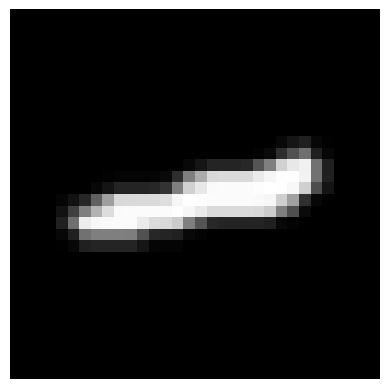

In [47]:
plot_image(X_train[16])